
# OBJECTIVE (Part 2)
Identify which metric to use for calibration of all models and ensembles from the perspective of flood frequency analysis

# EXPERIMENTS
* This notebook shows the FUSE output after calibration and compares with unregulated streamflow observations. 
* 12 experiments were conducted using KGE metric, using the FUSE-HECHMS configuration for a single random ensemble

## Set2
* exp7  - Daily KGE, 1 day smoothing, kge_a_alpha = 1.
* exp8  - Daily KGE, 1 day smoothing, kge_a_alpha = 2.
* exp9  - Daily KGE, 1 day smoothing, kge_a_alpha = 3.
* exp10 - Daily KGE, 1 day smoothing, kge_a_alpha = 4.
* exp11 - Daily KGE, 1 day smoothing, kge_a_alpha = 5.

## Set3
* exp12 - Daily KGE, 3 day smoothing, kge_a_alpha = 1.
* exp13 - Daily KGE, 3 day smoothing, kge_a_alpha = 2.
* exp14 - Daily KGE, 3 day smoothing, kge_a_alpha = 3.
* exp15 - Daily KGE, 3 day smoothing, kge_a_alpha = 4.
* exp16 - Daily KGE, 3 day smoothing, kge_a_alpha = 5.

# CONCLUSION
TBD

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
import pandas as pd
from scipy import stats

jtplot.style(theme='grade3')
plt.rcParams['figure.figsize'] = (15, 5)

In [5]:
# Best Simulation Output
file7 = '/glade/p/work/manab/ff/islandpark/output/exp7/001_222_runs_best.nc'
file8 = '/glade/p/work/manab/ff/islandpark/output/exp8/001_222_runs_best.nc'
file9 = '/glade/p/work/manab/ff/islandpark/output/exp9/001_222_runs_best.nc'
file10 = '/glade/p/work/manab/ff/islandpark/output/exp10/001_222_runs_best.nc'
file11 = '/glade/p/work/manab/ff/islandpark/output/exp11/001_222_runs_best.nc'
file12 = '/glade/p/work/manab/ff/islandpark/output/exp12/001_222_runs_best.nc'
file13 = '/glade/p/work/manab/ff/islandpark/output/exp13/001_222_runs_best.nc'
file14 = '/glade/p/work/manab/ff/islandpark/output/exp14/001_222_runs_best.nc'
file15 = '/glade/p/work/manab/ff/islandpark/output/exp15/001_222_runs_best.nc'
file16 = '/glade/p/work/manab/ff/islandpark/output/exp16/001_222_runs_best.nc'

# For extracting metric values from parameter files
pfile7 = '/glade/p/work/manab/ff/islandpark/output/exp7/001_222_para_best.nc'
pfile8 = '/glade/p/work/manab/ff/islandpark/output/exp8/001_222_para_best.nc'
pfile9 = '/glade/p/work/manab/ff/islandpark/output/exp9/001_222_para_best.nc'
pfile10 = '/glade/p/work/manab/ff/islandpark/output/exp10/001_222_para_best.nc'
pfile11 = '/glade/p/work/manab/ff/islandpark/output/exp11/001_222_para_best.nc'
pfile12 = '/glade/p/work/manab/ff/islandpark/output/exp12/001_222_para_best.nc'
pfile13 = '/glade/p/work/manab/ff/islandpark/output/exp13/001_222_para_best.nc'
pfile14 = '/glade/p/work/manab/ff/islandpark/output/exp14/001_222_para_best.nc'
pfile15 = '/glade/p/work/manab/ff/islandpark/output/exp15/001_222_para_best.nc'
pfile16 = '/glade/p/work/manab/ff/islandpark/output/exp16/001_222_para_best.nc'

forc = '/glade/p/work/manab/ff/islandpark/inputnew/001.nc'   #Forcing file

out7 = xr.open_dataset(file7)
out8 = xr.open_dataset(file8)
out9 = xr.open_dataset(file9)
out10 = xr.open_dataset(file10)
out11 = xr.open_dataset(file11)
out12 = xr.open_dataset(file12)
out13 = xr.open_dataset(file13)
out14 = xr.open_dataset(file14)
out15 = xr.open_dataset(file15)
out16 = xr.open_dataset(file16)

# For plotting
starttime = '2011-10-01'
endtime = '2013-09-30'

# DAILY SIMULATIONS
FUSE is simulated for 1970/01/01 - 2016/12/31 and calibrated for 1980/10/01 - 2014/09/31. The following plots shows daily streamflows for an example 2-year period

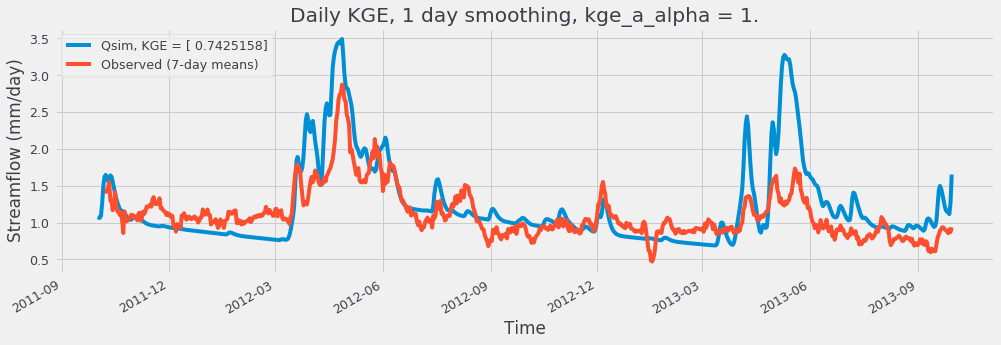

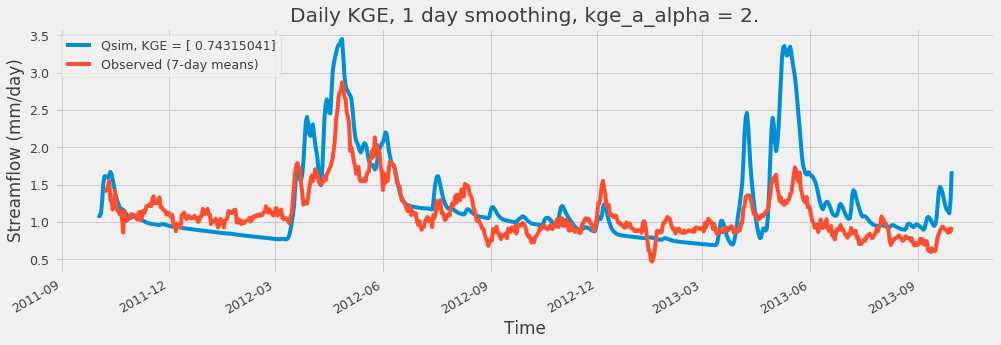

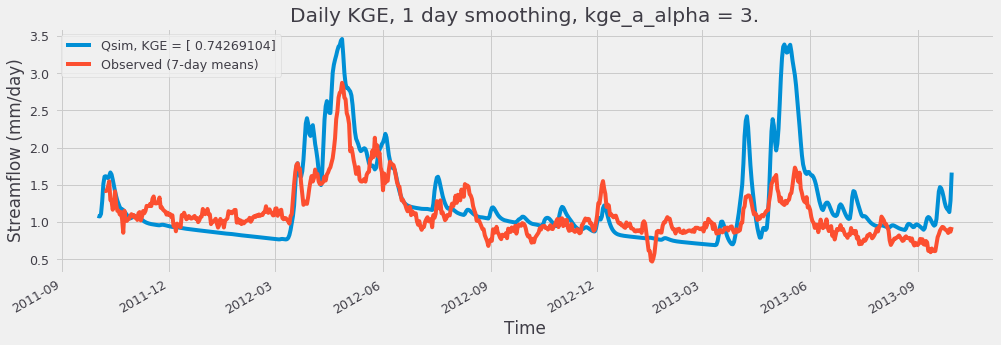

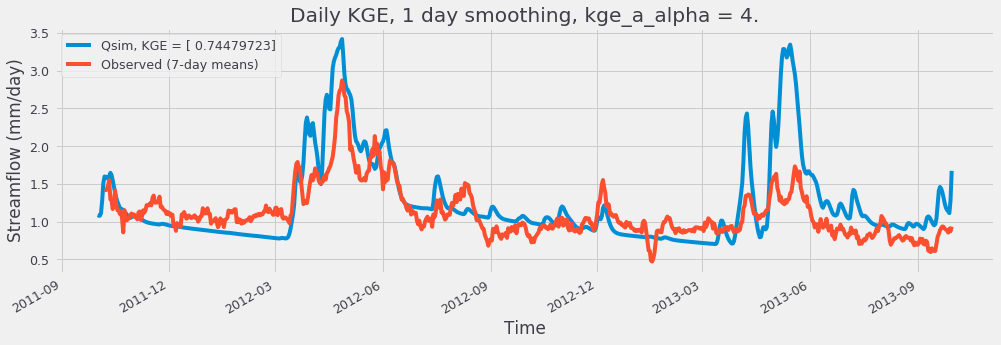

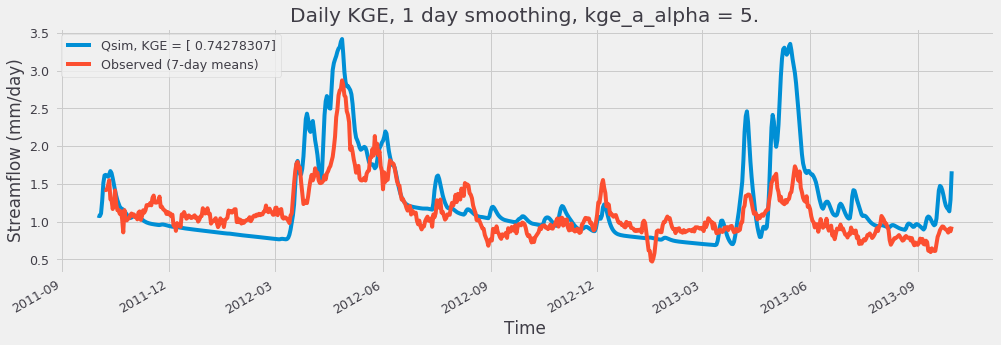

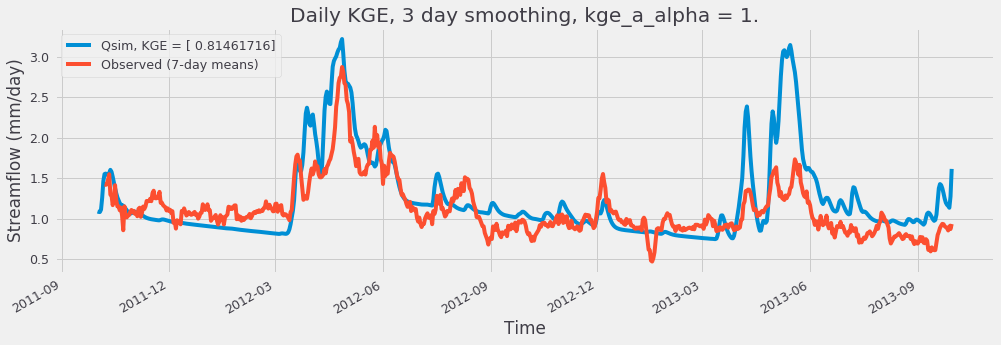

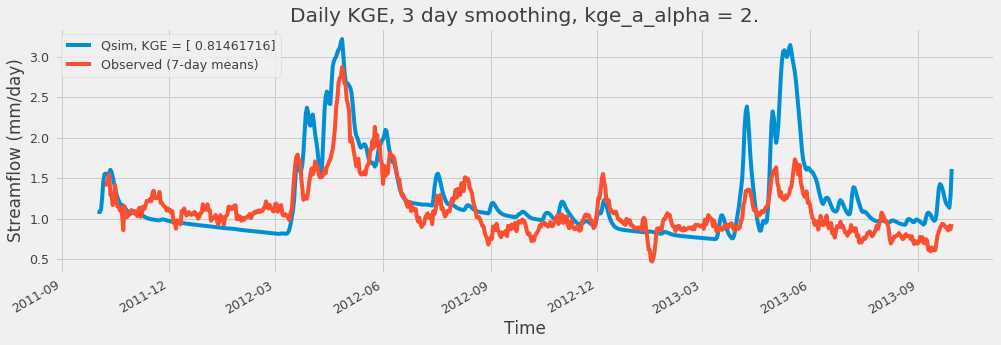

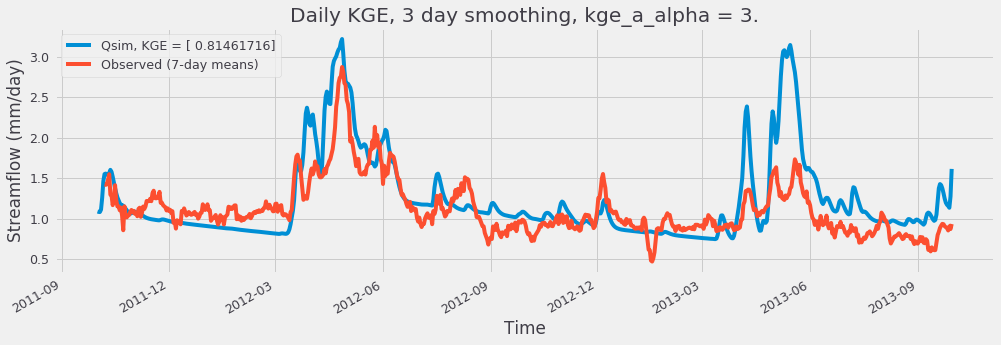

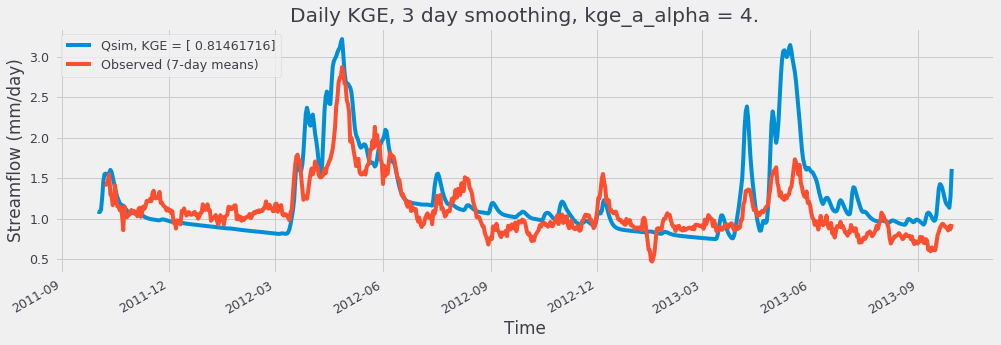

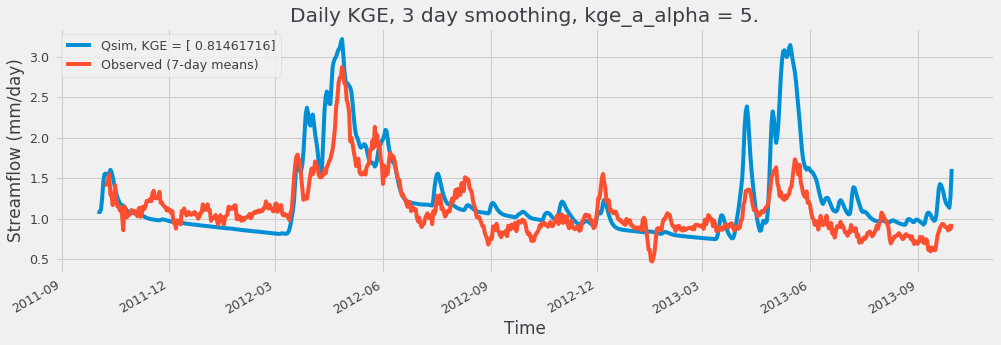

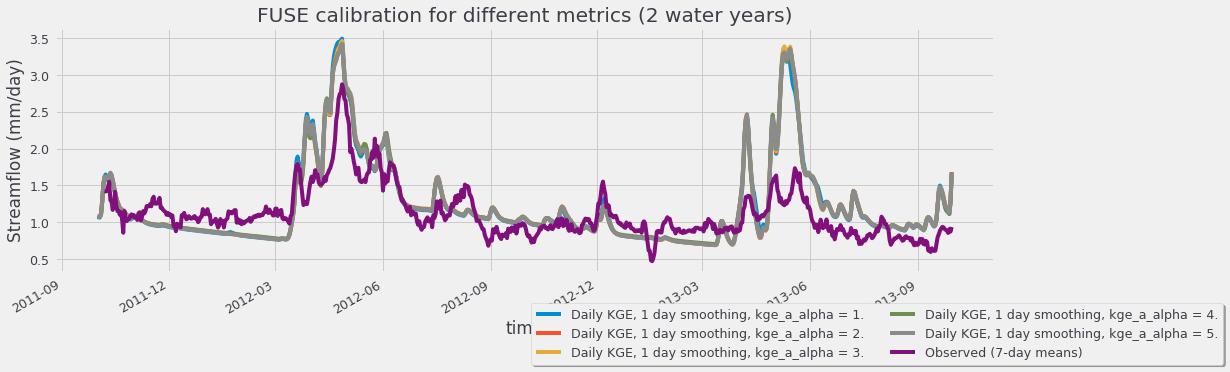

In [9]:
def plotsim(ncdat, ncvar, paramdat, paramvar, paramlabel, paramtitle):
    '''
    ncdat: FUSE output file
    ncvar: FUSE variable to be extracted
    paramlabel: Label of the variable ncvar in the plot
    paramdat: FUSE parameter file
    paramvar: Parameter to be extracted. Usually kge, kge_int, rmse
    paramtitle: Title of the plot
    '''
    plt.figure(figsize=(15,5))
    plt.style.use('fivethirtyeight')
    val = xr.open_dataset(paramdat)[paramvar].values  #Value of the parameter
    ncdat[ncvar].loc[starttime: endtime].plot(label = paramlabel+ ', KGE = '+ str(val))
    ncdat['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
    plt.xlabel('Time')
    plt.ylabel('Streamflow (mm/day)')
    plt.title(paramtitle)
    plt.legend()
    plt.show()
    
plotsim(out7, 'q_routed', pfile7, 'kge','Qsim', 'Daily KGE, 1 day smoothing, kge_a_alpha = 1.')
plotsim(out8, 'q_routed', pfile8, 'kge', 'Qsim', 'Daily KGE, 1 day smoothing, kge_a_alpha = 2.')
plotsim(out9, 'q_routed', pfile9, 'kge', 'Qsim', 'Daily KGE, 1 day smoothing, kge_a_alpha = 3.')
plotsim(out10, 'q_routed', pfile10, 'kge', 'Qsim', 'Daily KGE, 1 day smoothing, kge_a_alpha = 4.')
plotsim(out11, 'q_routed', pfile11, 'kge', 'Qsim', 'Daily KGE, 1 day smoothing, kge_a_alpha = 5.')
plotsim(out12, 'q_routed', pfile12, 'kge', 'Qsim', 'Daily KGE, 3 day smoothing, kge_a_alpha = 1.')
plotsim(out13, 'q_routed', pfile13, 'kge', 'Qsim', 'Daily KGE, 3 day smoothing, kge_a_alpha = 2.')
plotsim(out14, 'q_routed', pfile14, 'kge', 'Qsim', 'Daily KGE, 3 day smoothing, kge_a_alpha = 3.')
plotsim(out15, 'q_routed', pfile15, 'kge', 'Qsim', 'Daily KGE, 3 day smoothing, kge_a_alpha = 4.')
plotsim(out16, 'q_routed', pfile16, 'kge', 'Qsim', 'Daily KGE, 3 day smoothing, kge_a_alpha = 5.')


plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out7['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 1.')
out8['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 2.')
out9['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 3.')
out10['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 4.')
out11['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 5.')
#out12['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 1.')
#out13['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 2.')
#out14['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 3.')
#out15['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 4.')
#out16['q_routed'].loc[starttime: endtime].plot(label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 5.')

out7['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('FUSE calibration for different metrics (2 water years)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)
plt.show()

# YEARLY PEAK FLOW ANALYSIS

In [7]:
def ypeak(ncdat):
    '''
    Calculates the yearly peaks after 1980
    '''
    nc1 = ncdat.groupby('time.year').max()
    nc2 = nc1.where((nc1.year > 1979), drop = True)
    return(nc2)

Q7 = ypeak(out7)
Q8 = ypeak(out8)
Q9 = ypeak(out9)
Q10 = ypeak(out10)
Q11 = ypeak(out11)
Q12 = ypeak(out12)
Q13 = ypeak(out13)
Q14 = ypeak(out14)
Q15 = ypeak(out15)
Q16 = ypeak(out16)

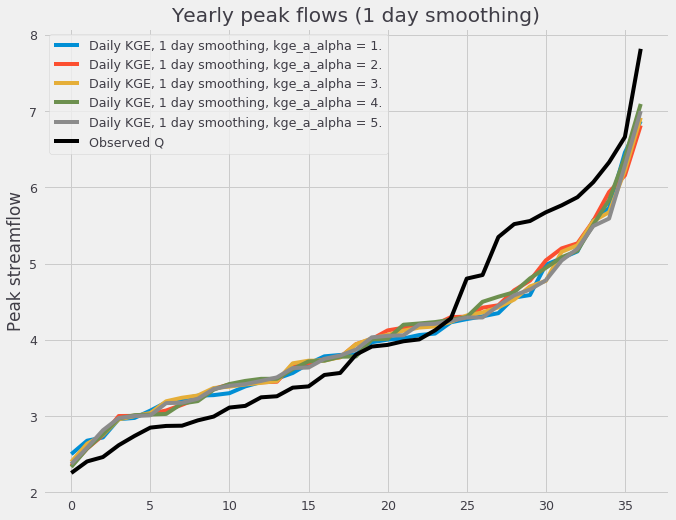

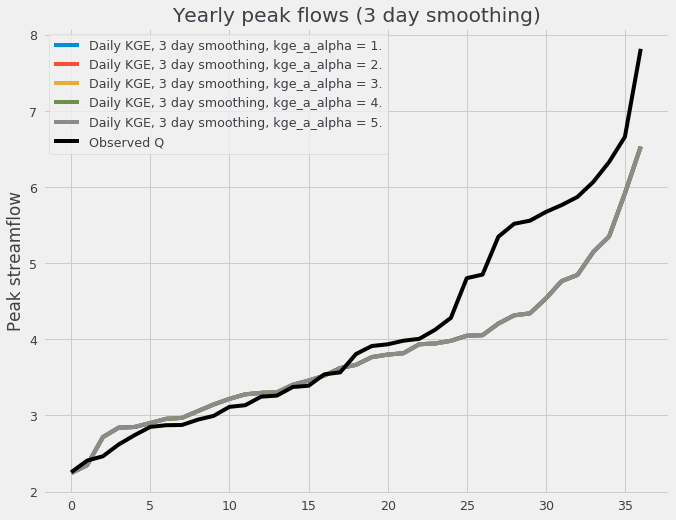

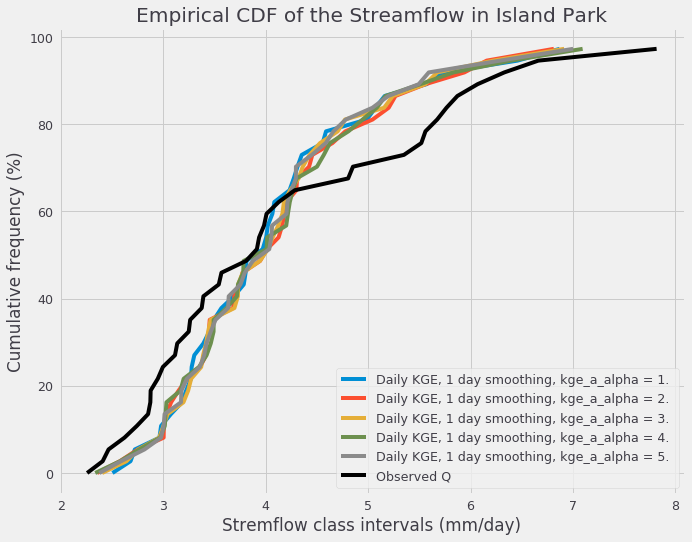

In [8]:
# Yearly peak flows
plt.figure(figsize=(10,8))
plt.plot(np.sort(Q7['q_routed']), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 1.')
plt.plot(np.sort(Q8['q_routed']), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 2.')
plt.plot(np.sort(Q9['q_routed']), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 3.')
plt.plot(np.sort(Q10['q_routed']), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 4.')
plt.plot(np.sort(Q11['q_routed']), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 5.')
plt.plot(np.sort(Q13['obsq']), label = 'Observed Q', color='black')
plt.ylabel('Peak streamflow')
plt.title('Yearly peak flows (1 day smoothing)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(np.sort(Q12['q_routed']), label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 1.')
plt.plot(np.sort(Q13['q_routed']), label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 2.')
plt.plot(np.sort(Q14['q_routed']), label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 3.')
plt.plot(np.sort(Q15['q_routed']), label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 4.')
plt.plot(np.sort(Q16['q_routed']), label = 'Daily KGE, 3 day smoothing, kge_a_alpha = 5.')
plt.plot(np.sort(Q13['obsq']), label = 'Observed Q', color='black')
plt.ylabel('Peak streamflow')
plt.title('Yearly peak flows (3 day smoothing)')
plt.legend()
plt.show()


# Empirical CDF
plt.figure(figsize=(10,8))
#Q['q_routed'].plot.hist(weights=np.zeros_like(Q['q_routed']) + 100. / Q['q_routed'].size, cumulative=True,edgecolor='#4aaaaa')
plt.plot(np.sort(Q7['q_routed']), np.linspace(0, 100, len(Q7['q_routed']), endpoint=False), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 1.')
plt.plot(np.sort(Q8['q_routed']), np.linspace(0, 100, len(Q8['q_routed']), endpoint=False), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 2. ')
plt.plot(np.sort(Q9['q_routed']), np.linspace(0, 100, len(Q9['q_routed']), endpoint=False), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 3.')
plt.plot(np.sort(Q10['q_routed']), np.linspace(0, 100, len(Q10['q_routed']), endpoint=False), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 4.')
plt.plot(np.sort(Q11['q_routed']), np.linspace(0, 100, len(Q11['q_routed']), endpoint=False), label = 'Daily KGE, 1 day smoothing, kge_a_alpha = 5.')

plt.plot(np.sort(Q7['obsq']), np.linspace(0, 100, len(Q7['obsq']), endpoint=False), label = 'Observed Q', color = 'black')
plt.ylabel('Cumulative frequency (%)')
plt.xlabel('Stremflow class intervals (mm/day)')
plt.title('Empirical CDF of the Streamflow in Island Park')
plt.legend()
plt.show()